In [26]:
from UCBLearner1 import *
from GenerateEnvironment import *
from tqdm import trange

In [39]:
env1, model, class_probability = generate_environment()
real_conv_rates = model["real_conversion_rates"]
prices = model["prices"]

T = 30 - 4
n_exp = 10
daily_user = 500

In [34]:
optimal_arm = optimization_algorithm(model, False)  # pull the optimal arm
print("Optimal_arm: ", optimal_arm)

optimal_act_rate = MC_simulation(model, real_conv_rates[range(5), optimal_arm], 5, 10000)

optimal_reward = return_reward(model, prices[range(5), optimal_arm],
                               real_conv_rates[range(5), optimal_arm], optimal_act_rate, model['real_alpha_ratio'], model['real_quantity'])
print("Optimal reward: ", optimal_reward)

Optimal_arm:  [1 0 1 0 0]
Optimal reward:  3.9431713537644453


In [40]:
learner = UCBLearner1(model)
instant_regret_rew = [[] for _ in range(n_exp)]
instant_regret_obs = [[] for _ in range(n_exp)]

In [41]:
for i in trange(n_exp):
    for t in range(4):
        arm = [t, t, t, t, t]
        alpha_ratio = env1.alpha_ratio_otd()
        data = env1.round_single_day(daily_user, alpha_ratio, arm, class_probability)
        env_data = conv_data(data)
        learner.update(arm, env_data)

        act_rate = MC_simulation(model, real_conv_rates[range(5), arm], 5)
        rew = return_reward(model, prices[range(5), arm],
                            real_conv_rates[range(5), arm], act_rate, model['real_alpha_ratio'], model['real_quantity'])

        obs_reward = 0
        if len(data):
            for i_ in range(len(data)):
                obs_reward += np.sum(data[i_][0])

            obs_reward /= len(data)

        instant_regret_rew[i].append(optimal_reward - rew)
        instant_regret_obs[i].append(optimal_reward - obs_reward)

    for t in range(T):
        pulled_arm = learner.act()
        alpha_ratio = env1.alpha_ratio_otd()
        data = env1.round_single_day(daily_user, alpha_ratio, pulled_arm, class_probability)
        env_data = conv_data(data)
        learner.update(pulled_arm, env_data)

        act_rate = MC_simulation(model, real_conv_rates[range(5), pulled_arm], 5)
        rew = return_reward(model, prices[range(5), pulled_arm],
                            real_conv_rates[range(5), pulled_arm], act_rate, model['real_alpha_ratio'], model['real_quantity'])

        obs_reward = 0
        if len(data):
            for i_ in range(len(data)):
                obs_reward += np.sum(data[i_][0])

            obs_reward /= len(data)

        instant_regret_rew[i].append(optimal_reward - rew)
        instant_regret_obs[i].append(optimal_reward - obs_reward)
    learner.reset()

100%|██████████| 10/10 [02:51<00:00, 17.13s/it]


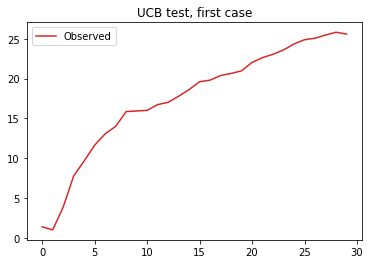

In [42]:
show_results(instant_regret_rew, instant_regret_obs, "UCB test, first case")

In [43]:
learner2 = UCBLearner1(model)
instant_regret_rew2 = [[] for _ in range(n_exp)]
instant_regret_obs2 = [[] for _ in range(n_exp)]

In [47]:
for i in trange(n_exp):

    for t in range(T+4):
        pulled_arm = learner2.act()
        alpha_ratio = env1.alpha_ratio_otd()
        data = env1.round_single_day(daily_user, alpha_ratio, pulled_arm, class_probability)
        env_data = conv_data(data)
        learner2.update(pulled_arm, env_data)

        act_rate = MC_simulation(model, real_conv_rates[range(5), pulled_arm], 5)
        rew = return_reward(model, prices[range(5), pulled_arm],
                            real_conv_rates[range(5), pulled_arm], act_rate, model['real_alpha_ratio'], model['real_quantity'])

        obs_reward = 0
        if len(data):
            for i_ in range(len(data)):
                obs_reward += np.sum(data[i_][0])

            obs_reward /= len(data)

        instant_regret_rew2[i].append(optimal_reward - rew)
        instant_regret_obs2[i].append(optimal_reward - obs_reward)

    learner2.reset()

100%|██████████| 10/10 [03:05<00:00, 18.53s/it]


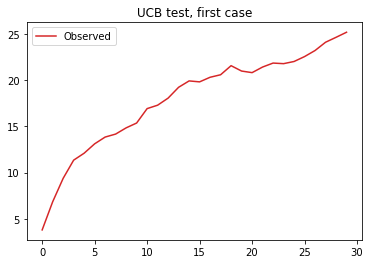

In [48]:
show_results(instant_regret_rew2, instant_regret_obs2, "UCB test, first case")